In [29]:
#This uses code from https://github.com/dms-vep/dms-vep-pipeline, please refer to this repository for more detailed information.

import sys

import Bio.SeqIO

import alignparse.utils

import dms_variants.codonvarianttable

import pandas as pd
pd.set_option('display.max_rows',10)

import seaborn as sns

import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

In [30]:
background='USSR77'
geneseq='ATGAAAGCAAAACTACTGGTCCTGTTATGTGCACTTTCAGCTACAGATGCAGACACAATATGTATAGGCTACCATGCGAACAACTCAACCGACACTGTTGACACAGTACTCGAAAAGAACGTGACAGTGACACACTCTGTCAACCTACTTGAGGACAGTCACAACGGAAAACTATGCAGACTAAAAGGAATAGCCCCACTACAATTGGGGAAATGCAACATTGCCGGATGGATCTTAGGAAACCCAGAATGCGAATCACTGTTTTCTAAGAAATCATGGTCCTACATTGCAGAAACACCAAACTCCGAGAATGGAACATGTTACCCAGGATATTTCGCCGACTATGAGGAATTGAGGGAGCAATTGAGCTCAGTATCATCATTCGAGAGATTCGAAATATTCCCCAAGGAAAGATCATGGCCCAAACACAACGTAACCAGAGGCGTAACGGCATCATGCTCCCATAAGGGGAAAAGCAGTTTTTACAGAAATTTGCTATGGCTGACGGAGAAAAATGGCTCGTACCCAAATCTGAGCAAGTCCTATGTGAACAACAAAGAGAAAGAAGTCCTTGTACTATGGGGTGTTCATCACCCGTCAAACATAGAGGACCAAAAGACCATCTATCGGAAAGAAAATGCTTATGTGTCTGTAGTGTCTTCAAATTATAACAGGAGATTCACCCCAGAAATAGCAGAAAGACCCAAAGTAAGAGGTCAAGCAGGGAGAATTAACTACTACTGGACTCTGCTGGAACCCGGGGACACAATAATATTTGAGGCAAATGGAAATCTAATAGCGCCATGGCATGCTTTCGCACTGAATAGAGGCTTTGGGTCAGGAATCATCACCTCAAACGCATCGATGGATGAATGTGACACGAAGTGTCAAACACCCCAGGGAGCTATAAACAGTAGTCTTCCTTTCCAGAATATACACCCAGTCACAATAGGGGAGTGCCCAAAATACGTCAGGAGTACAAAATTGAGGATGGTTACAGGACTAAGGAACATCCCATCCATTCAATCCAGAGGTCTGTTTGGAGCCATTGCCGGTTTCATTGAAGGGGGATGGACTGGAATGATAGATGGATGGTATGGTTATCATCATCAGAATGAACAGGGATCTGGCTATGCTGCGGATCAAAAAAGCACACAAAATGCCATTAACGGGATTACAAACAAGGTGAACTCTGTTATCGAGAAAATGAACACTCAATTCACAGCTGTGGGTAAAGAATTCAACAAATTAGAAAAAAGGATGGAAAACTTAAATAAAAAAGTTGATGATGGATTTCTGGACATTTGGACATATAATGCAGAATTGTTGGTTCTACTGGAAAATGAAAGGACTTTGGATTTTCATGACTCAAATGTGAAGAATCTGTATGAGAAAGTAAAAAGCCAATTAAAGAATAATGCCAAAGAAATAGGAAACGGGTGTTTTGAATTCTACCACAAGTGTAACAATGAATGCATGGAAAGTGTAAAAAATGGAACTTATGACTATCCAAAATATTCAGAGGAATCAAAGTTAAACAGGGAAAAAATTGATGGAGTGAAATTGGAATCAATGGGAGTCTATCAGATTCTGGCGATCTACTCAACTGTCGCCAGTTCACTGGTCCTGCTCGTGTCACTGGGAGCCATCAGCTTCTGGATGTGCAGCAACGGCAGCCTCCAGTGTAGGATTTGCATTTAA'


In [31]:
variants = dms_variants.codonvarianttable.CodonVariantTable(
    barcode_variant_file=f'data/codon_variant_tables/codon_variant_table_{background}.csv',
    geneseq=geneseq,
    allowgaps=True,
    substitutions_are_codon=True,
    primary_target=background,
    substitutions_col="codon_substitutions",
)

In [32]:
variants_df=variants.barcode_variant_df
variants_df

,target,library,barcode,variant_call_support,codon_substitutions,aa_substitutions,n_codon_substitutions,n_aa_substitutions
0,USSR77,rep1,ACAACAGAGTGCAGCTAGACGACCAACC,1,CCA176ACA,P176T,1,1
1,USSR77,rep1,ACAACTGTAAGTAGCTAGGCTGTGCGGC,4,GTA125CAA,V125Q,1,1
2,USSR77,rep1,ACAAGATCGGTCAGCTCAGTATCTGAAT,4,GTG216GAT,V216D,1,1
3,USSR77,rep1,ACAAGGATTTACAGCTCGGTTCACCCAG,3,AGC179TTC,S179F,1,1
4,USSR77,rep1,ACAAGGATTTACAGCTTGGTTGCTACTC,1,AGC179TTC,S179F,1,1
...,...,...,...,...,...,...,...,...
262795,USSR77,rep2,TTGCATCCGACGAGCTAATTATCACCTA,6,TCA127TTC,S127F,1,1
262796,USSR77,rep2,TTGCATCCGACGAGCTTCTTGATCTGAT,2,TCA127CAA,S127Q,1,1
262797,USSR77,rep2,TTGCATCCGACGAGCTTTCATCCCATGC,1,TCA127CTT,S127L,1,1
262798,USSR77,rep2,TTGCCTTGCCTCAGCTGAAGCATAGGTA,4,GAG120AAA,E120K,1,1


In [33]:
replicate_list=['rep1','rep2']
variant_counts=pd.DataFrame()
for rep in replicate_list:
    replicate = rep[-1:]
    variant_counts = pd.concat(
        [   variant_counts,
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_Plasmid.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='Plasmid',
            ),
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_P1.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='P1',
            ),
        ]
    )
assert variant_counts.notnull().all().all()

In [34]:
variant_counts

,Unnamed: 0,barcode,count,codon_substitutions,aa_substitutions,variant_call_support,library,sample
0,0,ACAACTGTAAGTAGCTAGGCTGTGCGGC,55,GTA125CAA,V125Q,4,rep1,Plasmid
1,1,ACAAGGATTTACAGCTCGGTTCACCCAG,146,AGC179TTC,S179F,3,rep1,Plasmid
2,2,ACAAGGATTTACAGCTTGGTTGCTACTC,92,AGC179TTC,S179F,1,rep1,Plasmid
3,3,ACAAGTGGAGAGAGCTCCAATTATCAAT,60,AAT275TCA,N275S,4,rep1,Plasmid
4,4,ACAATAATAGCGAGCTAACCTCTGTCAA,158,TCA221TAT,S221Y,6,rep1,Plasmid
...,...,...,...,...,...,...,...,...
36795,36795,GCAATTTACGTCAGCTTTCCGGTCAACT,1573,AAG180AGA,K180R,3,rep2,P1
36796,36796,GCAATTTACGTCAGCTTTTATTGACCTC,105,AAG180TCA,K180S,2,rep2,P1
36797,36797,GCAATTTACGTCAGCTTTTCAAGTTGAA,120,AAG180AGA,K180R,1,rep2,P1
36798,36798,GTAAAGACTTAGAGCTCCGTACGCCTTA,10,TCC181GAT TTC227TTA,S181D F227L,2,rep2,P1


In [35]:
min_wt_count=1000
min_wt_frac=0.001

wt_fracs = (
    variant_counts.assign(
        wt_aa_sequence=lambda x: (x["aa_substitutions"] == "").map(
            {True: "wt", False: "not_wt"}
        )
    )
    .groupby(["library", "sample", "wt_aa_sequence"], as_index=False)
    .aggregate({"count": "sum"})
    .pivot_table(index=["library", "sample"], values="count", columns="wt_aa_sequence")
    .assign(frac_wt=lambda x: x["wt"] / x["not_wt"])
    .assign(
        adequate_wt_counts=lambda x: x["wt"] >= min_wt_count,
        adequate_wt_frac=lambda x: x["frac_wt"] >= min_wt_frac,
        adequate_wt=lambda x: x["adequate_wt_counts"] | x["adequate_wt_frac"],
    )
)
if not wt_fracs["adequate_wt"].all():
    raise ValueError(f"Inadequate wildtype counts or fraction:\n{str(wt_fracs)}")

variants.add_sample_counts_df(variant_counts)

In [36]:
func_scores = variants.func_scores(
    preselection='Plasmid',
    pseudocount=0.5,
    libraries='all',
    by='aa_substitutions',
    syn_as_wt=False
)

In [37]:
renumber = alignparse.utils.MutationRenumber(
    number_mapping=pd.read_csv(f'data/renumbering_files/{background}_renumber.csv'),
    old_num_col="sequential_site",
    new_num_col="reference_site",
    wt_nt_col=None,
    allow_letter_suffixed_numbers=True,
)

In [38]:
func_scores = (
    func_scores.query(f"target == '{background}'")
    .drop(columns=["target"])
    .rename(columns={"aa_substitutions": "aa_substitutions_sequential"})
    .assign(
        aa_substitutions_reference=lambda x: (
            x["aa_substitutions_sequential"].apply(
                renumber.renumber_muts,
                allow_gaps=True,
                allow_stop=True,
            )
        ),
    )
)

In [39]:
func_scores.query("library == 'rep1' ").to_csv(f'data/func_scores/{background}_R1.csv')
func_scores.query("library == 'rep2' ").to_csv(f'data/func_scores/{background}_R2.csv')
func_scores.query("library == 'all libraries' ").to_csv(f'data/func_scores/{background}_all.csv')

In [40]:
df=func_scores.pivot_table(columns='library',index='aa_substitutions_reference',values='func_score').dropna().reset_index()
df

library,aa_substitutions_reference,rep1,rep2,all libraries
0,,-0.030561,-0.074855,-0.050927
1,A100*,-6.034584,-8.907646,-6.494153
2,A100-,-11.793036,-14.036929,-12.423732
3,A100C,-2.897144,-3.330441,-3.081314
4,A100D,0.281696,0.469984,0.408924
...,...,...,...,...
3674,Y98R,0.237319,-2.498841,-0.823622
3675,Y98S,-1.256462,-0.958837,-1.010641
3676,Y98T,0.184136,1.273698,0.608539
3677,Y98V,0.247541,0.257548,0.278183


0.8135942623364647 0.0 3679


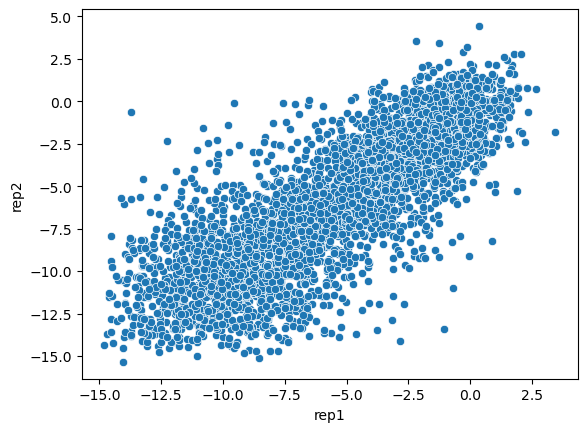

In [41]:
sns.scatterplot(df,x='rep1',y='rep2')
r, p = sp.stats.pearsonr(x=df['rep1'], y=df['rep2'])
print(r,p,len(df))

In [14]:
func_scores

,library,pre_sample,post_sample,aa_substitutions_sequential,func_score,func_score_var,pre_count,post_count,pre_count_wt,post_count_wt,pseudocount,n_aa_substitutions,aa_substitutions_reference
0,rep1,Plasmid,P1,N104A,0.002952,0.000271,9114,54710,519427,3111531,0.5,1,N91A
1,rep1,Plasmid,P1,N104P,-3.166484,0.000946,5525,3686,519427,3111531,0.5,1,N91P
2,rep1,Plasmid,P1,N201-,-7.244596,0.003404,16113,636,519427,3111531,0.5,1,N187-
3,rep1,Plasmid,P1,S139Y,-7.638456,0.007410,9629,289,519427,3111531,0.5,1,S126Y
4,rep1,Plasmid,P1,R119N,-5.011946,0.003061,4349,807,519427,3111531,0.5,1,R106N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13892,all libraries,Plasmid,P1,E137D N557K,-7.724755,1.426487,53,1,695807,4126763,0.5,2,E124D N543K
13893,all libraries,Plasmid,P1,S86H L251M,-1.575137,0.059566,52,104,695807,4126763,0.5,2,S73H L237M
13894,all libraries,Plasmid,P1,V47F L265D,-2.316712,0.072951,52,62,695807,4126763,0.5,2,V34F L251D
13895,all libraries,Plasmid,P1,P253R V537F,-3.473391,0.116105,51,27,695807,4126763,0.5,2,P239R V523F
